# Supervised Learning Capstone Project - Tree Methods Focus 




----


------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----




## Part 0: Imports and Read in the Data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check
Confirming quickly with .info() method the datatypes and non-null values in our dataframe.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


A quick statistical summary of the numeric columns with .describe() , I can notice that many columns are categorical, meaning coulumns will eventually need to convert them to dummy variables.**

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

Confirming that there are no NaN cells by displaying NaN values per feature column.**

In [285]:
# CODE HERE
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Vizualizing the balance of the class labels (Churn) with a Count Plot.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

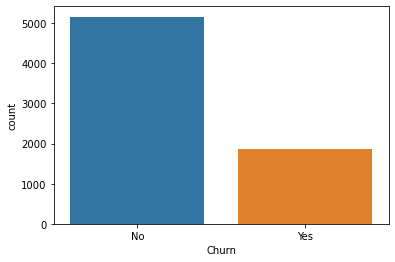

In [7]:
sns.countplot(data=df, x='Churn')

Exploring the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

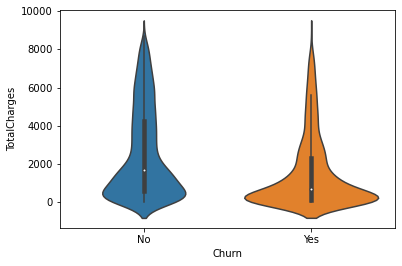

In [287]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

Creating a boxplot showing the distribution of TotalCharges per Contract type.

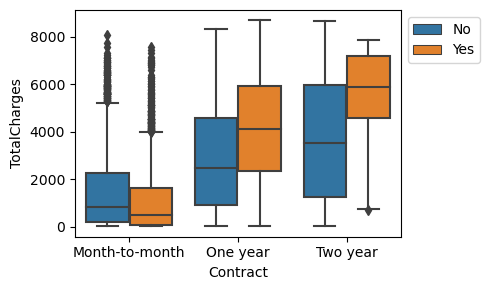

In [8]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(bbox_to_anchor= (1,1))
plt.tight_layout()

People who are in month-to-month service, they dont expect to be on the service for long time. Reason that they are taking month-to-month service bcoz they eventually going to churn maybe after a few months. They dont want to be on service for a long time

If we compare people who take one year or two year contracts, the people who will churn has higher TotalCharges.

That means after one year or two year of contracts people are likely to churn because they are having more charges


***Creating a bar plot showing the correlation of the following features to the class label. There are some categorical features, they has to be converted into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Here I specifically listed only the some features above as some features have too many unique instances for such an analysis, such as customerID***

In [17]:
corr = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']])

In [18]:
corr

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,1,0
7028,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7029,0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7030,1,0,1,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [10]:
corr.corr()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [291]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Im checking what are main features that are correlated with Churn_Yes

In [13]:
corr_df = corr.corr()

In [14]:
corr_Churn_Yes = corr_df['Churn_Yes'].sort_values(ascending=True).iloc[1:-1]

In [15]:
corr_Churn_Yes

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

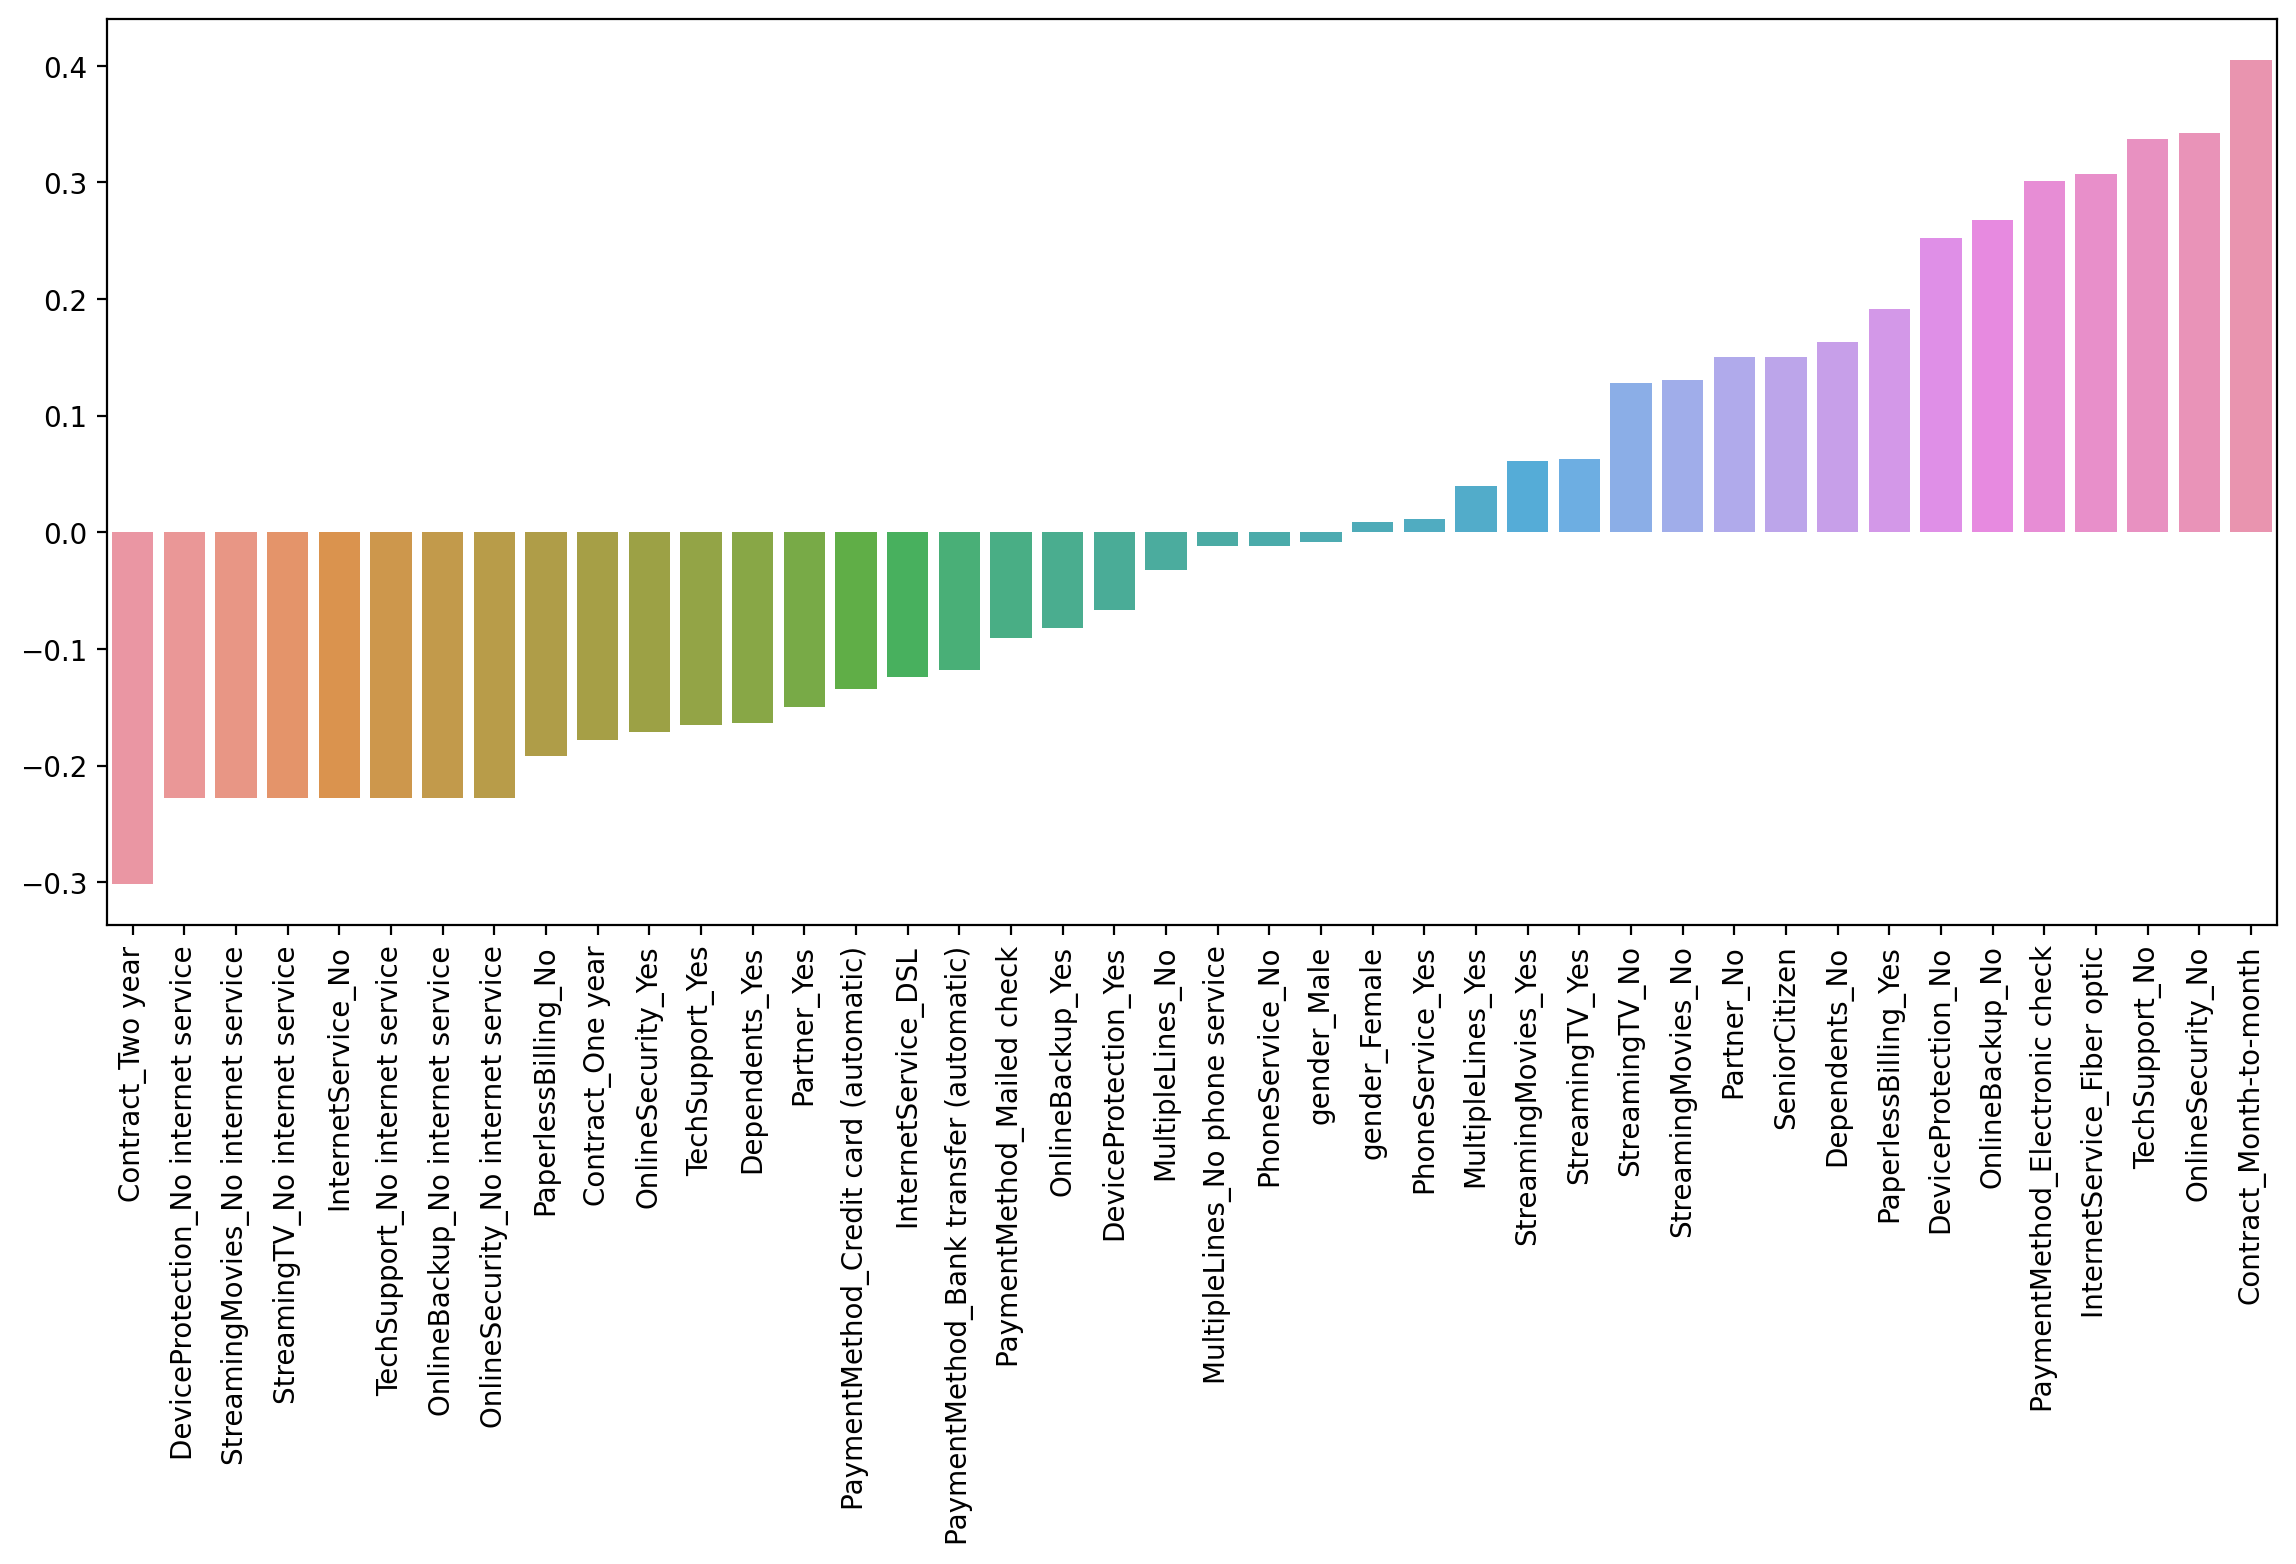

In [16]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(x=corr_Churn_Yes.index, y=corr_Churn_Yes.values)
plt.xticks(rotation=90);

The above Visualization tells that people who are in month_to_month contract they are highly correalated to Churn_Yes


***So that makes sense because as it was before that people who took month_to_month contract they are not expecting to be in service long time, they are Churning after 1 or 2 months.***

# Part 3: Churn Analysis
---


**This section focuses on segementing customers based on their tenure, creating "cohorts", examining differences between customer cohort segments.**

In [19]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Creating a histogram that displays the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

In [20]:
#number of months that a customer is in service
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

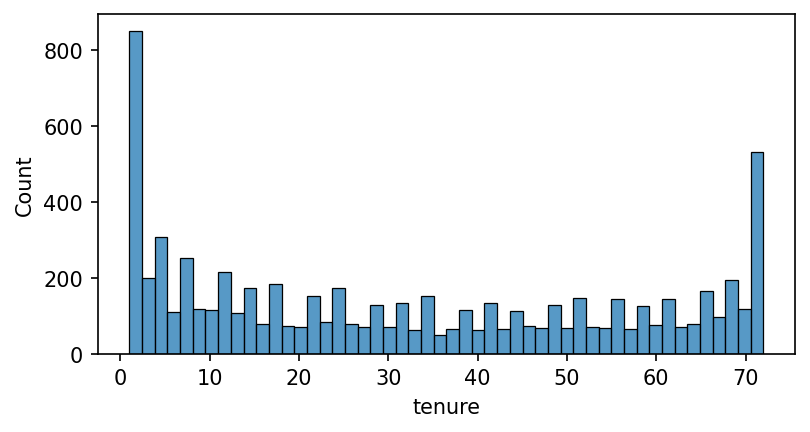

In [21]:
plt.figure(figsize=(6,3), dpi=150)
sns.histplot(data=df,x='tenure', bins=50)

It can be seen that there are very higher number of people with very low tensure that is 1 or 2 months

Second highest count is above 70, they are long run customers.

**Creating histograms separated by two additional features, Churn and Contract.**

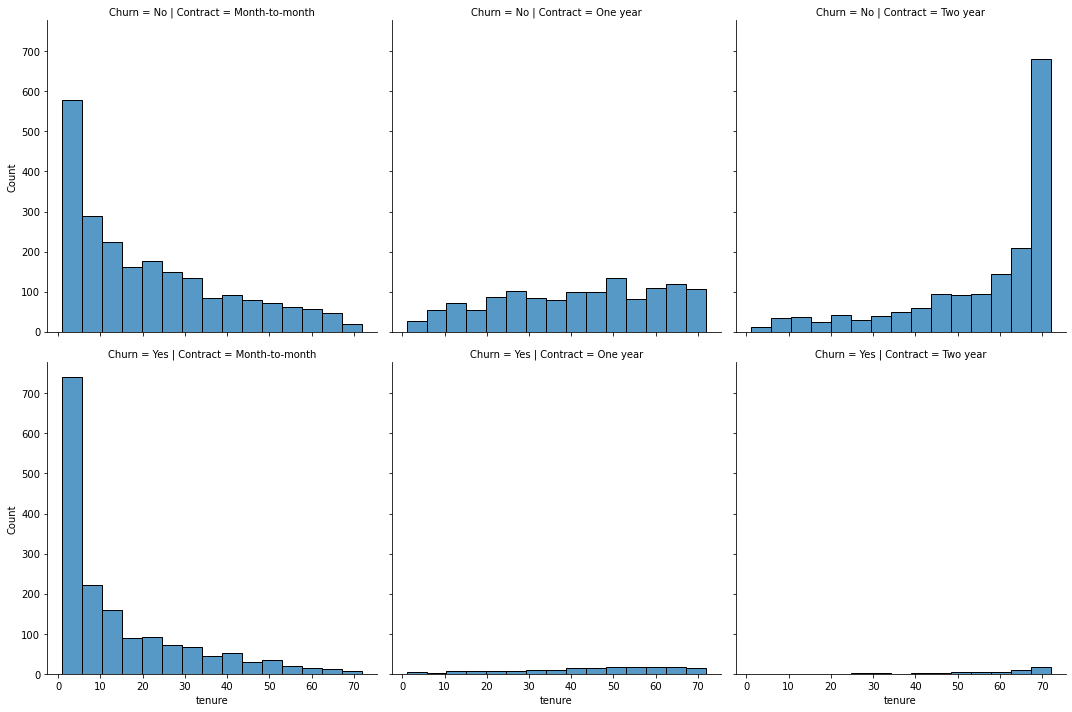

In [22]:
sns.displot(data=df,x='tenure', col='Contract', row = "Churn")

So its confirm that people are not churning when they are in long run contract like 1 or 2 years

People are churning when they are in month_to_month contract vs     1 year and 2 year and its evently split in month_to_month contract whether it is Churn_Yes or Churn_No

**Displaying a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

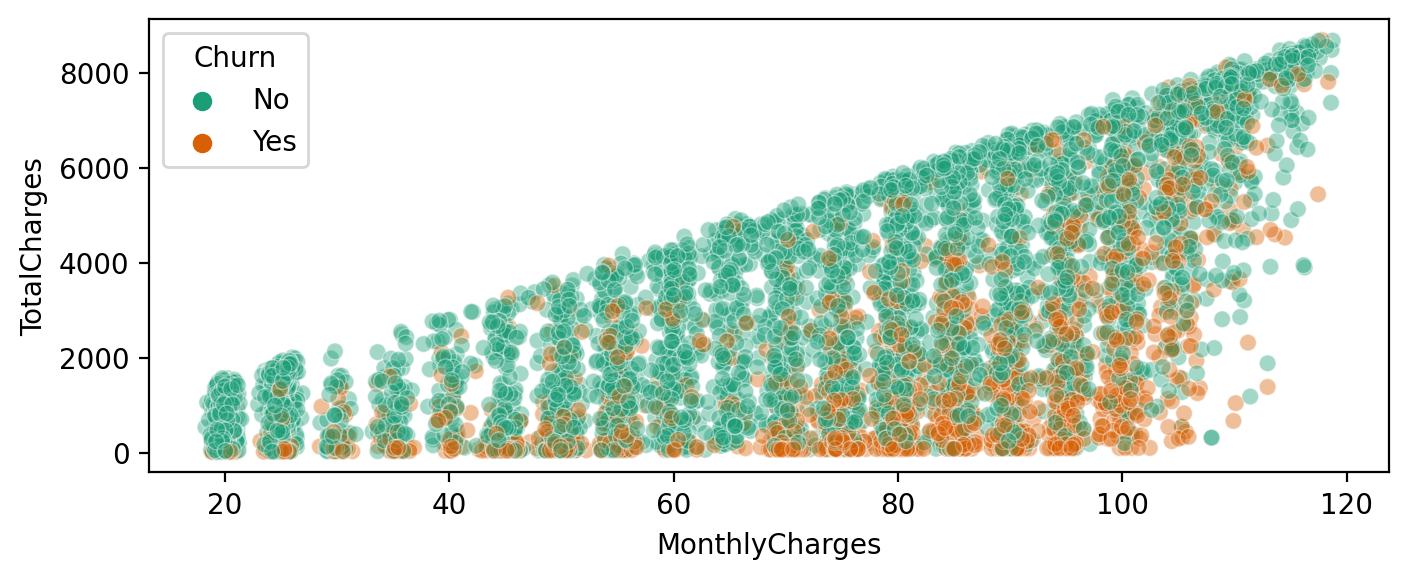

In [23]:
plt.figure(figsize=(8,3), dpi=200)
sns.scatterplot(data=df, y='TotalCharges', x='MonthlyCharges', hue='Churn', palette='Dark2', alpha=0.4)

Here in above plot between MonthlyCharges vs TotalCharges.. The Lot of people tend to churn when their MonthlyCharges are higher.

That makes sense beacause if you are paying more and more per month you better end up that service and find another service which is cheaper for you!!

**What is causing people to churn?**

So from all the plots so far, People are paying more in month_to month service and that leads people to churn!!

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort, I have calculated the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [32]:
Churn_Yes = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [35]:
Churn_Yes

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


The above dataframe represents people who are churned per tenure

for example : In column 1 there are 380 people who are churned and has 1 month of tenure and same with other coulumns..

In [30]:
Churn_No = df.groupby(['Churn','tenure']).count().transpose()['No']

In [31]:
Churn_No

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


The above dataframe represents people who are not churned per tenure

for example : In column 1 there are 233 people who are not churned and has 1 month of tenure and same with other coulumns..

In [37]:
churn_rate = 100 * Churn_Yes/(Churn_Yes+Churn_No)

In [38]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

I have calculated percetage of people that Churned based on their Tenure

**Now that we have Churn Rate per tenure group 1-72 months, Let's create a plot showing churn rate per months of tenure.**

Text(0, 0.5, 'Churn_Percentage')

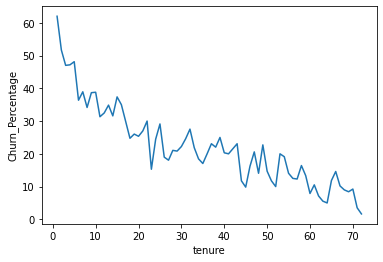

In [39]:
churn_rate.iloc[0].plot()
plt.ylabel('Churn_Percentage')

### Broader Cohort Groups
**Based on the tenure column values, Let's create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    
Grouping people together on the above four categories

In [40]:
def Cohort(tenure):
    if tenure < 13:
        return  '0-12 Months'
    elif tenure < 24:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 months'
    else:
        return 'Over 48 Months'

In [41]:
df['Tenure Cohort'] = df['tenure'].apply(Cohort)

In [42]:
df[['tenure', 'Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 months
2,2,0-12 Months
3,45,24-48 months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 months
9,62,Over 48 Months


**Creating a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous plot.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

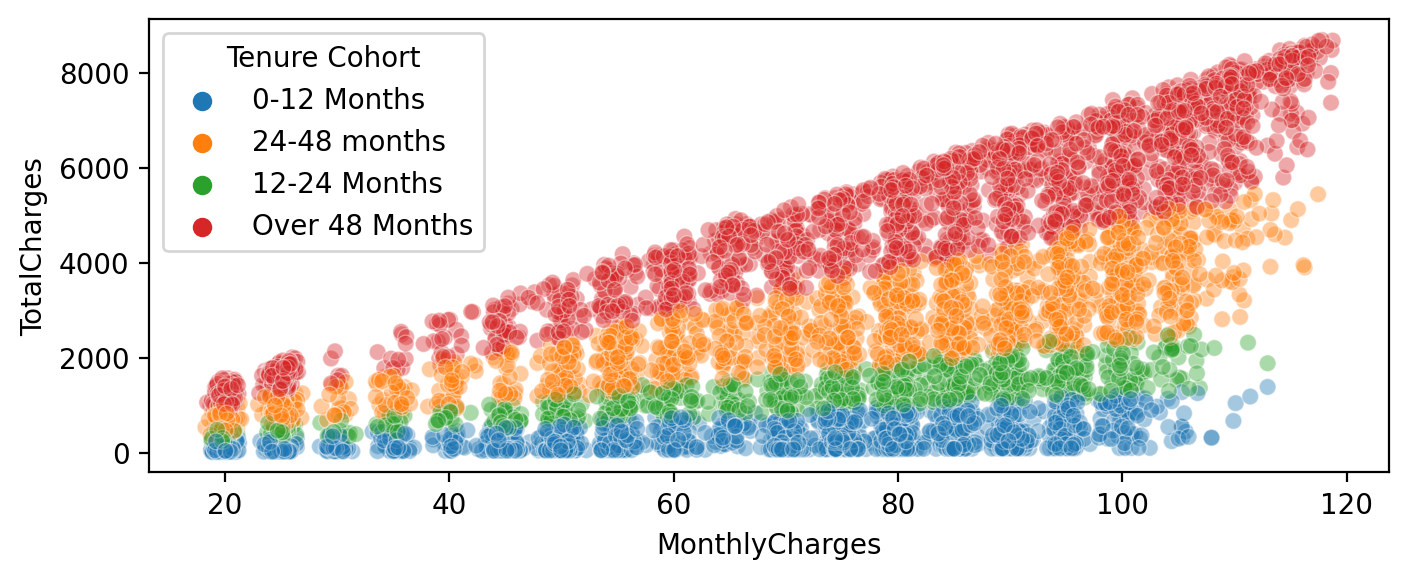

In [43]:
plt.figure(figsize=(8,3), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.4)

The people who are staying in service for morethan 48 months are having high MonthlyCharges and TotalCharges

**Creating a count plot showing the churn count per cohort.**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

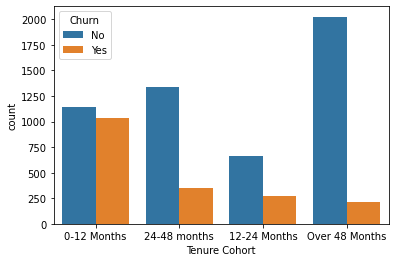

In [44]:
sns.countplot(data=df, x='Tenure Cohort',hue='Churn')

**Creating a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

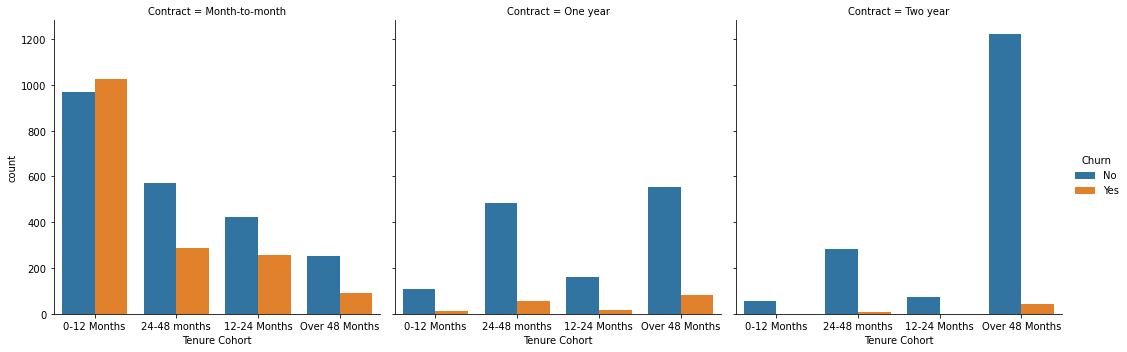

In [45]:
sns.catplot(data=df, x='Tenure Cohort', col='Contract', hue='Churn', kind='count')

-----

# Part 4: Predictive Modeling

**Here I'm comparing 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**


## Single Decision Tree

**Separating out the data into X features and Y label. 

Creating dummy variables where necessary and droping features that are not useful.**

In [46]:
df = df.drop('customerID', axis=1)

In [47]:
df = pd.get_dummies(data=df, drop_first=True)

In [48]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,0,0,1,0,0,1,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,0,0,0,0,1
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0


In [49]:
X = df.drop('Churn_Yes', axis=1)

In [51]:
y = df['Churn_Yes']

**Performing train test split, holding out 10% of the data for testing.**

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model.
   2. Evaluating performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculating feature importances from the decision tree.
   4. Plotting Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
tree_model = DecisionTreeClassifier(max_depth=5)

**Performing cross validation using GridSrachCV**

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {'max_depth': [1,2,3,4,5,6]}

In [59]:
grid_model = GridSearchCV(tree_model, param_grid)

In [61]:
#fitting model
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6]})

In [62]:
#finding best parameters
grid_model.best_params_

{'max_depth': 5}

In [63]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [66]:
preds = tree_model.predict(X_test)

**Testing how well model performed**

In [67]:
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix

In [69]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       557
           1       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



Model performing good on people that did not Churn and not performing well on people who Churn

But overall ACCURACY is 80%

In [70]:
confusion_matrix(y_test,preds)

array([[497,  60],
       [ 83,  64]], dtype=int64)

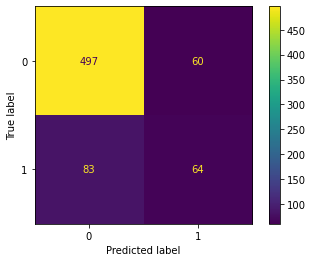

In [72]:
plot_confusion_matrix(tree_model, X_test, y_test )

Model misclassified 83 people incorrecty and also predicted 60 people incorrectly that they will churn when they won't.

**Finding Important Features**

In [77]:
feat_imp = tree_model.feature_importances_

In [78]:
feat_imp

array([0.00817464, 0.45223938, 0.02467061, 0.04661291, 0.        ,
       0.        , 0.        , 0.        , 0.00754192, 0.00799877,
       0.34022334, 0.        , 0.        , 0.00567638, 0.        ,
       0.00578629, 0.        , 0.        , 0.        , 0.00852294,
       0.0284796 , 0.        , 0.        , 0.        , 0.00962181,
       0.02332128, 0.        , 0.        , 0.03113012, 0.        ,
       0.        , 0.        , 0.        ])

In [89]:
imp_feats = pd.DataFrame(data=feat_imp,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

In [90]:
imp_feats

,Feature Importance
DeviceProtection_No internet service,0.000000
Tenure Cohort_12-24 Months,0.000000
PaymentMethod_Mailed check,0.000000
PaymentMethod_Credit card (automatic),0.000000
PaperlessBilling_Yes,0.000000
StreamingMovies_Yes,0.000000
StreamingMovies_No internet service,0.000000
StreamingTV_Yes,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_Yes,0.000000


In [91]:
imp_feats = imp_feats[imp_feats['Feature Importance']>0]

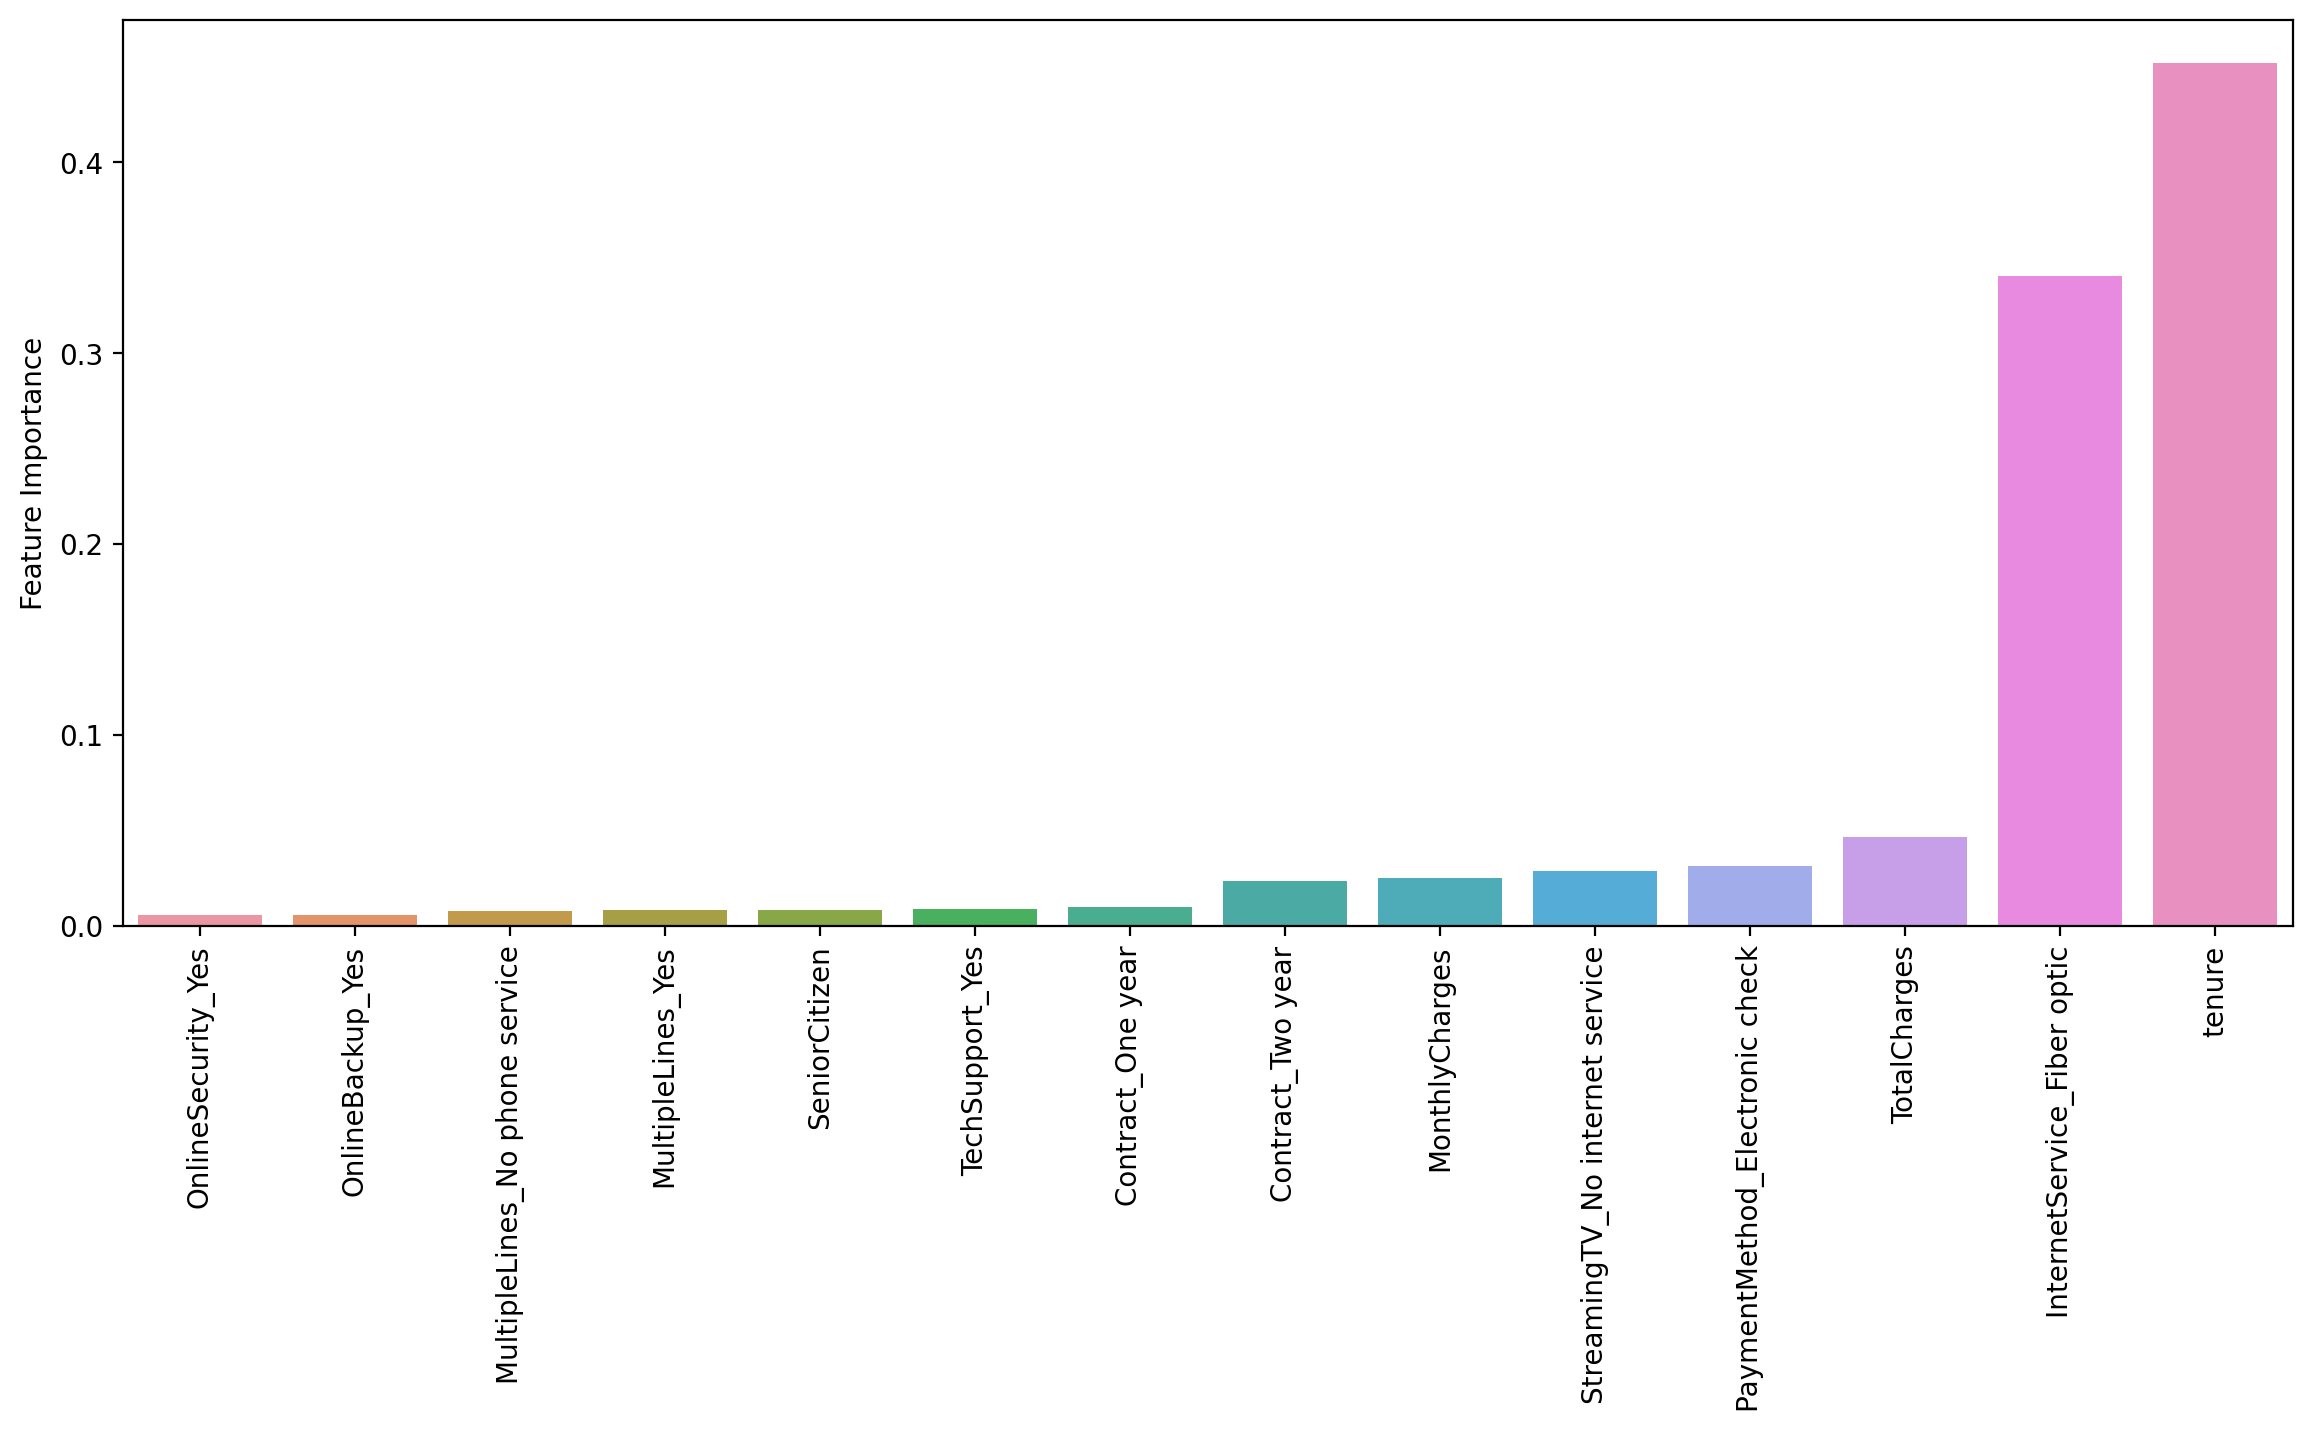

In [93]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index,y='Feature Importance')
plt.xticks(rotation=90);

From previous plots only tensure was seen as important feature but here InternetService_Fibre_optic is also a very important feature

In [94]:
from sklearn.tree import plot_tree

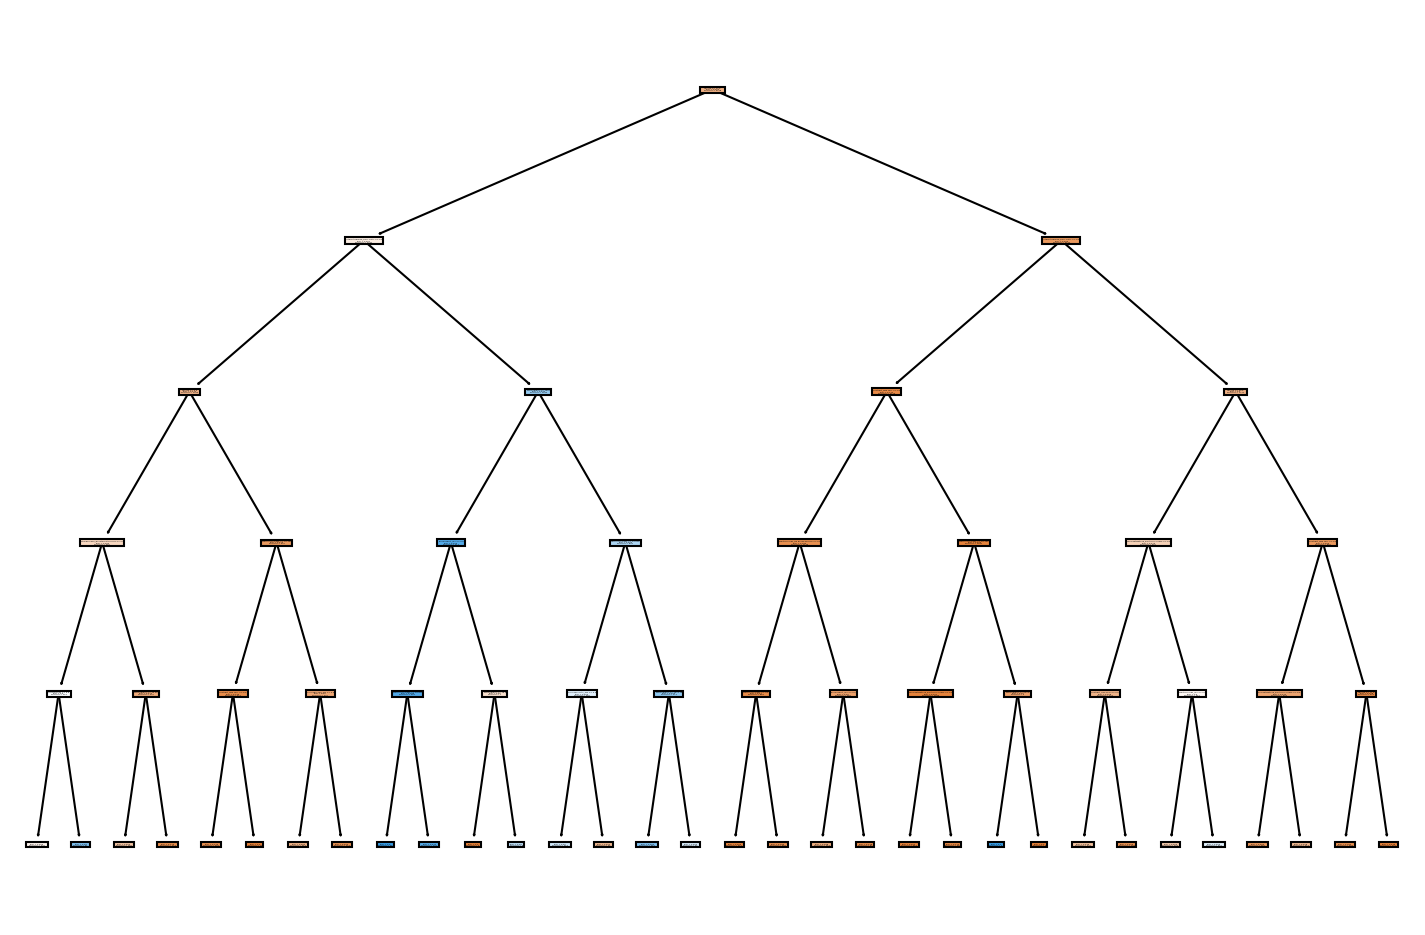

In [95]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree_model,filled=True,feature_names=X.columns);

## Random Forest

**Creating a Random Forest model and creating a classification report and confusion matrix from its predicted results on the test set.**

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rfc = RandomForestClassifier(n_estimators=100)

In [98]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
rfc_preds = rfc.predict(X_test)

In [100]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       557
           1       0.53      0.48      0.50       147

    accuracy                           0.80       704
   macro avg       0.70      0.68      0.69       704
weighted avg       0.80      0.80      0.80       704



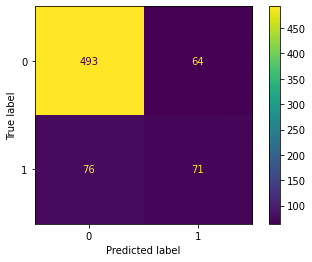

In [101]:
plot_confusion_matrix(rfc, X_test,y_test )

## Boosted Trees

**Using AdaBoost to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
ada_model = AdaBoostClassifier()

In [104]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [105]:
ada_preds = ada_model.predict(X_test)

In [106]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       557
           1       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



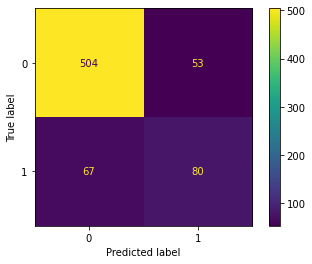

In [107]:
plot_confusion_matrix(ada_model, X_test, y_test)

**Analysing results, which model performed best?**

**With base models, we got best performance from an AdaBoostClassifier.**